# Importing necessary libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Reading Motor cars dataset

In [102]:
cars=pd.read_csv('mtcars.csv')

### Using the motorcars dataset.


The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 


Details :
    
A data frame with 12 observations on 11 continous variables and 1 categorical variable.

1. mpg 	Miles/(US) gallon
2. cyl 	Number of cylinders
3. disp 	Displacement (cu.in.)
4. hp 	Gross horsepower
5. drat 	Rear axle ratio
6. wt 	Weight (1000 lbs)
7. qsec 	1/4 mile time
8. vs 	Engine (0 = V-shaped, 1 = straight)
9. am 	Transmission (0 = automatic, 1 = manual)
10. gear 	Number of forward gears
11. carb 	Number of carburetors 



# Trying to understand what's inside the dataset first

In [3]:
cars.sample(5)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4



# Gathering more insights-dtypes,observation and feature count

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB



### Insights

1. Observation count  -  32
2. Feature count      -  12
3. Categorical Feature-  3  (cylinders,transmission,vs engine)
4. Continous Feature  -  8 
5. Dtypes             -  1 Object,11 Numerical

# Checking for Duplicates

In [5]:
cars.duplicated(keep='first').sum()

0

### Points:

1. There are no duplicates in the dataset
2. Incase if any duplicate is present we need not drop it since size of dataset is not big

# Checking for Null values

In [6]:
cars.isnull().sum().sum()

0

### Points:

1. There are no null values in dataset
2. We need not perform imputations

# Univariate Analysis

### Univariate analysis for continous variables

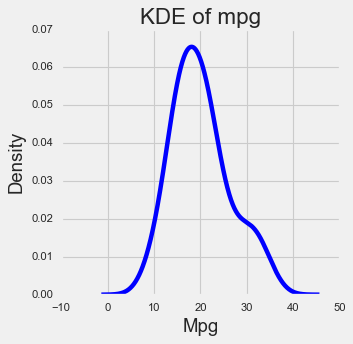

In [26]:
plt.figure(figsize=(4,4))
cars['mpg'].plot(kind='kde',color='blue')
plt.title('KDE of mpg')
plt.xlabel('Mpg')
plt.style.use(style='fivethirtyeight')
plt.show()

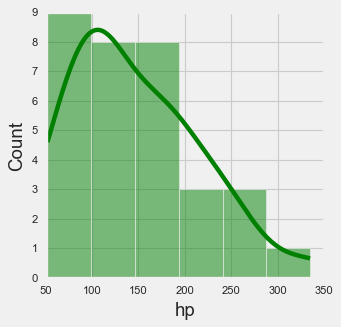

In [35]:
plt.figure(figsize=(4,4))
sns.histplot(data=cars['hp'],color='green',kde=True)
plt.show()

<Figure size 800x400 with 0 Axes>

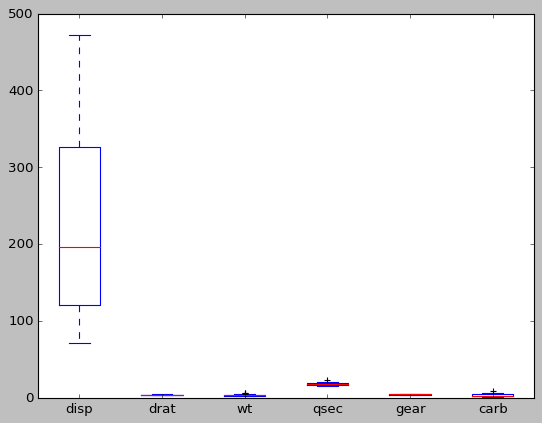

In [8]:
plt.figure(figsize=(10,5))
cars[['disp','drat','wt','qsec','gear','carb']].plot(kind='box')
plt.style.use(style='classic')
plt.show()

### Univariate analysis for categorical variables

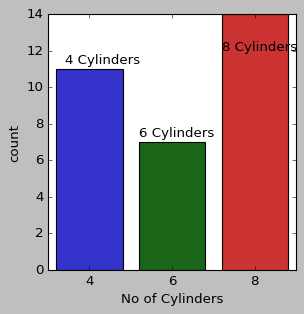

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(data=cars,x='cyl',saturation=0.60)
plt.xlabel('No of Cylinders')
plt.text(x=-0.3,y=11.3,s='4 Cylinders')
plt.text(x=0.6,y=7.3,s='6 Cylinders')
plt.text(x=1.6,y=12,s='8 Cylinders')
plt.show()


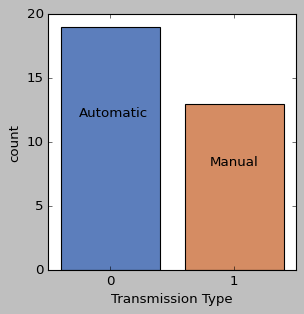

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(data=cars,x='am',palette='muted',saturation=0.70)
plt.xlabel('Transmission Type')
plt.text(x=-0.25,y=12,s='Automatic')
plt.text(x=0.8,y=8.2,s='Manual')
plt.show()


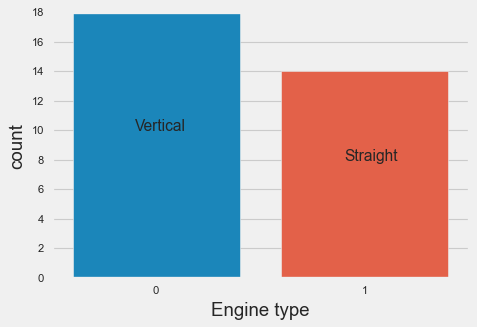

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(data=cars,x='vs')
plt.xlabel('Engine type')
plt.text(x=-0.1,y=10,s='Vertical')
plt.text(x=0.9,y=8,s='Straight')
plt.show()

### Points
1. Continous variable
    1. Mpg values are normally distributed
    2. HP seems to have outliers since it is positively skewed
    3. disp is positively skewed 
    4. drat,wt,gr have positive kurtosis,means sharp peak around median
    5. qsec,wt,carb seem to have some outliers
2. Categorical variable
    1. 8 cylinder cars are major in this dataset
    2. Automatic cars are mostly preferred
   

# Bivariate analysis

[]

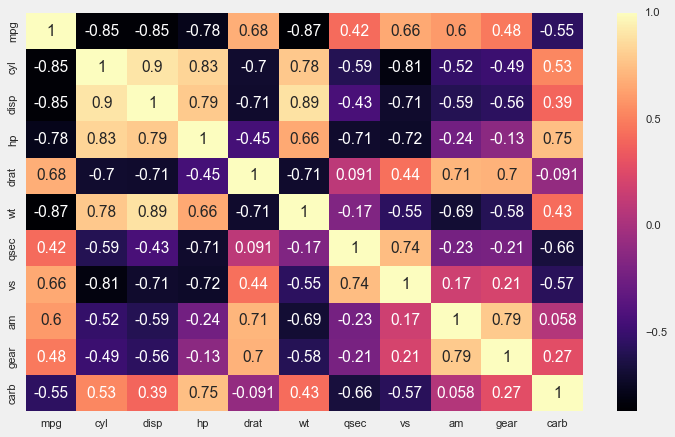

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(cars.corr(numeric_only=True),cmap='magma',annot=True)
plt.plot()

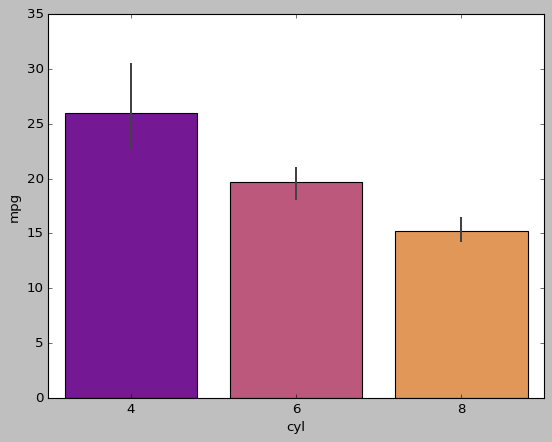

In [23]:
sns.barplot(x ='cyl', y ='mpg', data = cars,
            palette ='plasma',estimator='median')
plt.show()

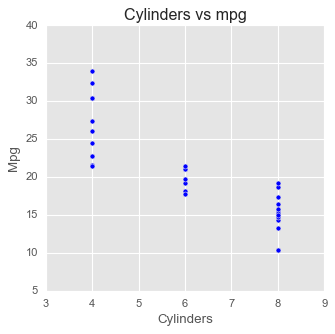

In [138]:
plt.figure(figsize=(4,4))
plt.scatter(cars['cyl'],cars['mpg'])
plt.title('Cylinders vs mpg')
plt.xlabel('Cylinders')
plt.ylabel('Mpg')
plt.style.use(style='ggplot')
plt.show()

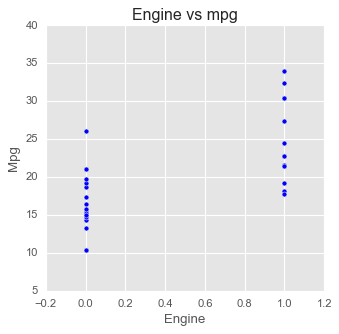

In [137]:
plt.figure(figsize=(4,4))
plt.scatter(cars['vs'],cars['mpg'])
plt.title('Engine vs mpg')
plt.xlabel('Engine')
plt.ylabel('Mpg')
plt.style.use(style='ggplot')
plt.show()

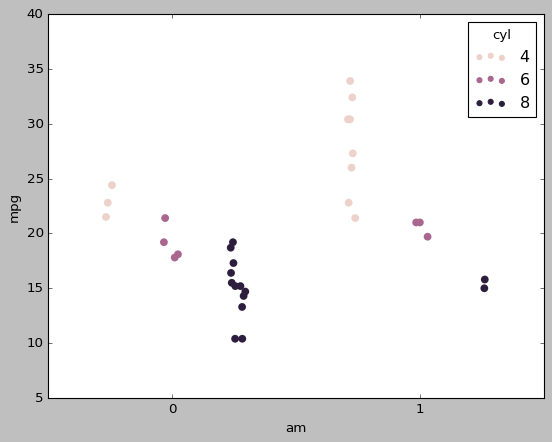

In [34]:
plt.figure(figsize=(8,6))
sns.stripplot(x ='am', y ='mpg', data = cars,jitter = True, dodge = True,size=7,hue='cyl')
plt.show()

## Points

1. From heatmap,it is clear that cyl,wt,drat,hp,vs are important features for our later model
2. From scatter plots:
    1. 4 cylinder cars have highest mpg
    2. Straight engine types mpg range between 18-35
    3. Manual transmission cars provide high mpg

# Multivariate Analysis

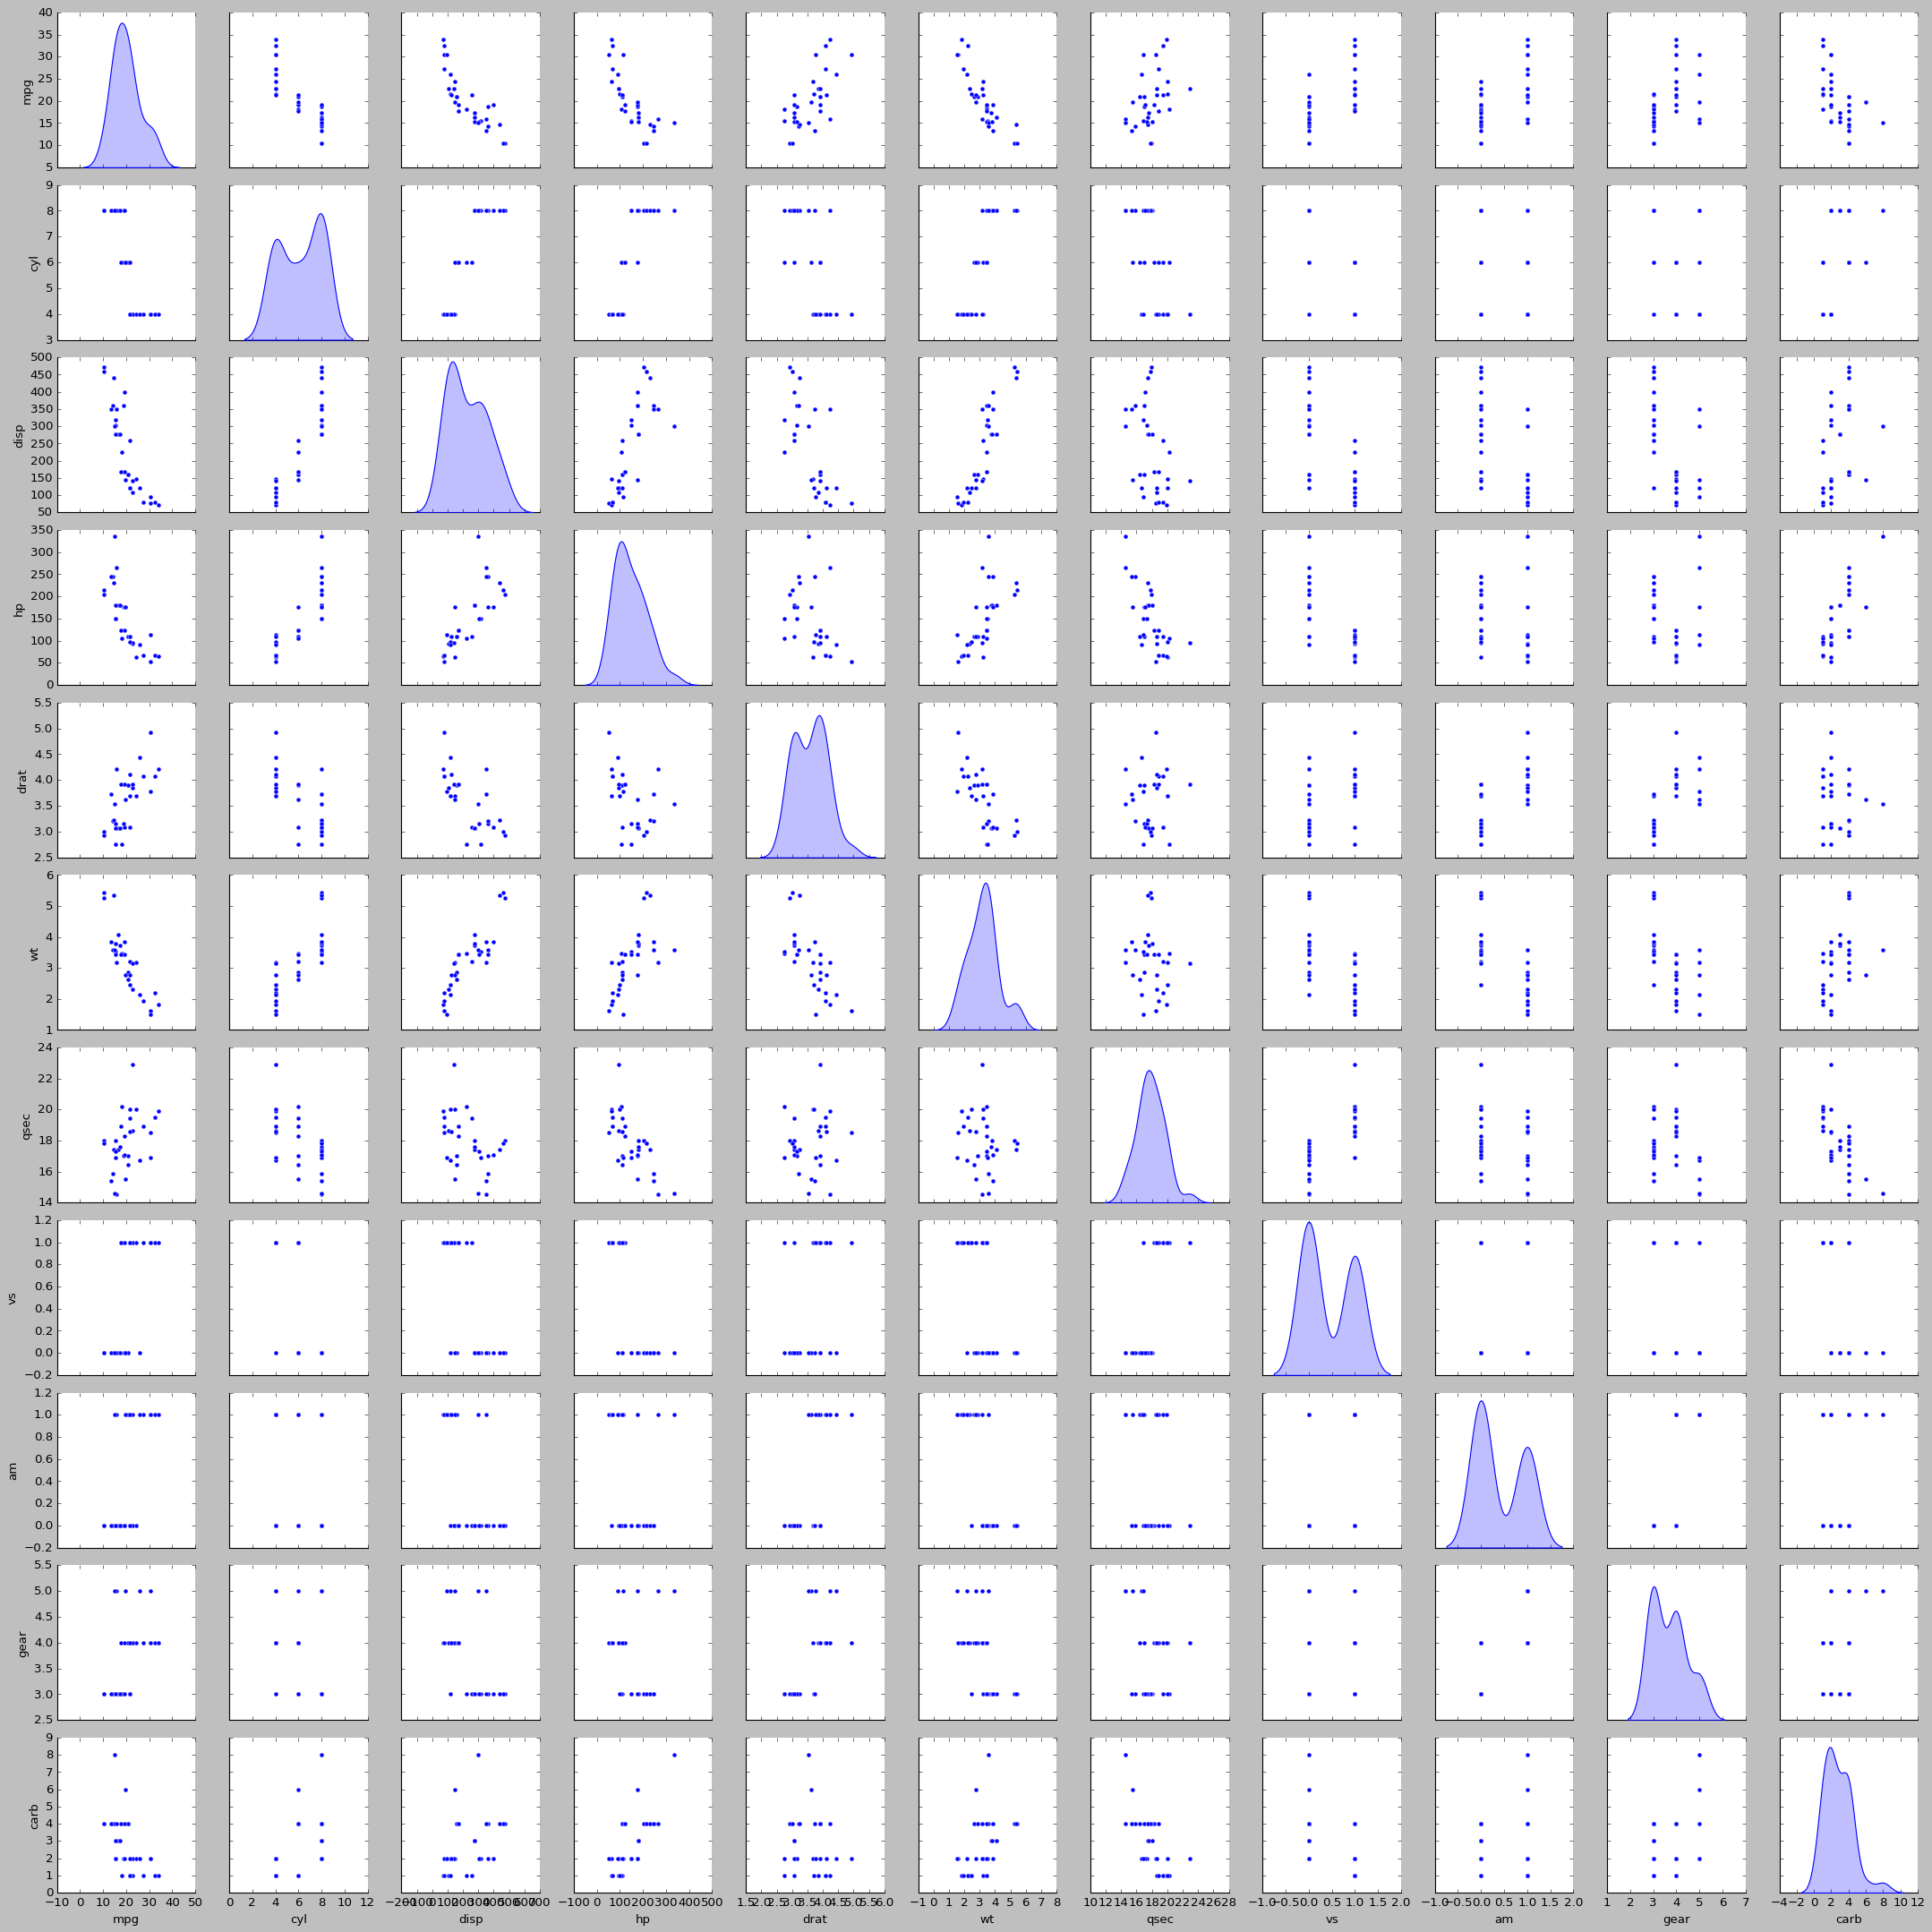

In [104]:
sns.pairplot(cars, diag_kind='kde')
plt.show()

- We can see that most of the continuous features have normal distribution
- We can see sharp peaks in the distribution for categorical features
- Mpg is higher for vehicles with 4 cylinders
- There is a negative correlation between mpg and disp

# Encoding categorical variables

### Points

1. Since the number of feature is less,we can perform OneHotEncoding
2. This wont add up to computational costs and other expense while training and developing model later

In [41]:
ohe=OneHotEncoder(sparse=False)

In [68]:
encoded_cyl=pd.DataFrame(ohe.fit_transform(cars[['cyl']]))
encoded_cyl.columns=ohe.get_feature_names_out()
encoded_cyl

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cyl_4,cyl_6,cyl_8
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,1.0,0.0


In [99]:
ohe=OneHotEncoder(sparse=False)
encoded_am=pd.DataFrame(ohe.fit_transform(cars[['am']]))
encoded_am.columns=ohe.get_feature_names_out()
encoded_am

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,am_0,am_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [70]:
ohe=OneHotEncoder(sparse=False)
encoded_vs=pd.DataFrame(ohe.fit_transform(cars[['vs']]))
encoded_vs.columns=ohe.get_feature_names_out()
encoded_vs

C:\Users\balaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,vs_0,vs_1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


# Concatenating OneHotEncoded columns to original dataset

In [88]:
encoded_cars=pd.concat((cars,encoded_cyl,encoded_am,encoded_vs),axis=1)
encoded_cars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_4,cyl_6,cyl_8,am_0,am_1,vs_0,vs_1
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Dropping categorical columns since it is now OneHotEncoded

In [91]:
encoded_cars.drop(['cyl','vs','am'],axis=1,inplace=True)

# Dropping Name columns since it is not necessary for model

In [93]:
encoded_cars.drop('name',axis=1,inplace=True)

# Splitting Dataset to train and test data

In [96]:
#segregating dependent feature 

x=encoded_cars.drop('mpg',axis=1)
y=encoded_cars['mpg']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)